<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Chapter_7_exmaple_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.2 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF G(s) =  
100 s^2 + 700 s + 1000
----------------------
  s^3 + 7 s^2 + 12 s

Closed loop TF =  
   100 s^2 + 700 s + 1000
----------------------------
s^3 + 107 s^2 + 712 s + 1000

Poles =  [-99.97851277+0.j  -5.03493899+0.j  -1.98654824+0.j]
Zeros =  [-5.+0.j -2.+0.j]


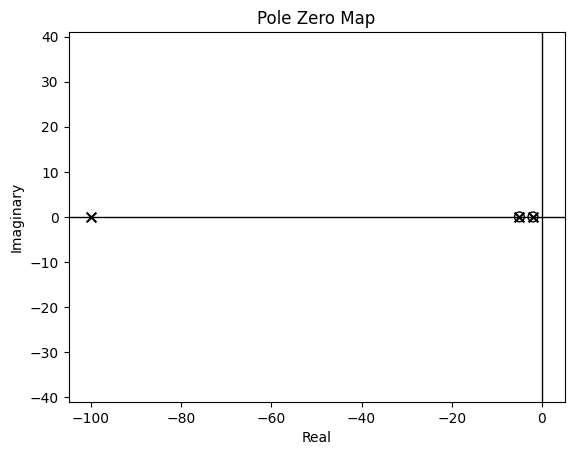

In [5]:
# Define your transfer open-loop transfer function:
#G(s) = 100(s+2)(s+6) / s(s+3)(s+4)

# Coefficients of the numerator
num = np.polymul([0,100], np.polymul([1, 2],[1,5]))
# Coefficients of the denominator
den = np.polymul([1,0], np.polymul([1, 3],[1,4]))

G = tf(num,den)
print("Open loop TF G(s) = ", G)

# closed loop TF
TF = feedback(G, 1)
print("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

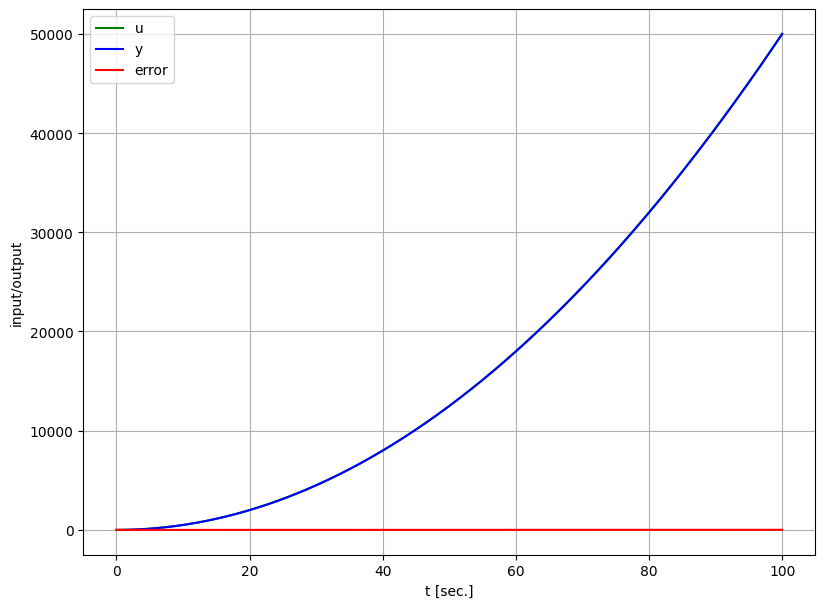

In [8]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 100
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

#r = 5 * np.ones(nt)
#r = 5 * t
r = 5 * t**2

# Simulation :
(t, y) = forced_response(TF, T=t, U=r, X0=0)

error = r - y

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, y, "blue")
plt.plot(t, error, "red")
plt.grid()

plt.legend(labels =("u", "y", "error"))

plt.ylabel("input/output")
plt.xlabel("t [sec.]")

plt.savefig("sim_tf.pdf")